#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:", 'images:', x_img_train.shape,
      " labels:", y_label_train.shape) 
print("test  data:", 'images:', x_img_test.shape ,
      " labels:", y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])
history = model.fit(x=x_img_train_normalize, 
                    y=y_label_train_OneHot, 
                    epochs=25, 
                    batch_size=256, 
                    validation_split=0.2, 
                    verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 3s 85us/step - loss: 2.2440 - acc: 0.1629 - val_loss: 2.1788 - val_acc: 0.2716
Epoch 2/25
40000/40000 [==============================] - 2s 49us/step - loss: 2.0597 - acc: 0.2520 - val_loss: 2.0495 - val_acc: 0.2887
Epoch 3/25
40000/40000 [==============================] - 2s 49us/step - loss: 1.9671 - acc: 0.2908 - val_loss: 2.0271 - val_acc: 0.2917
Epoch 4/25
40000/40000 [==============================] - 2s 49us/step - loss: 1.9004 - acc: 0.3217 - val_loss: 1.9172 - val_acc: 0.3576
Epoch 5/25
40000/40000 [==============================] - 2s 49us/step - loss: 1.8346 - acc: 0.3468 - val_loss: 1.8813 - val_acc: 0.3754
Epoch 6/25
40000/40000 [==============================] - 2s 49us/step - loss: 1.7701 - acc: 0.3712 - val_loss: 1.7986 - val_acc: 0.3979
Epoch 7/25
40000/40000 [==============================] - 2s 49us/step - loss: 1.7140 - acc: 0.3900 - val_loss: 1.7852 - val_acc

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    # plot results
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    epochs = len(loss)
    plt.plot(range(epochs), loss, marker='.', label='loss')
    plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(2,1,2)
    plt.title('Accuracy')
    plt.plot(range(epochs), acc, marker='.', label='acc')
    plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()

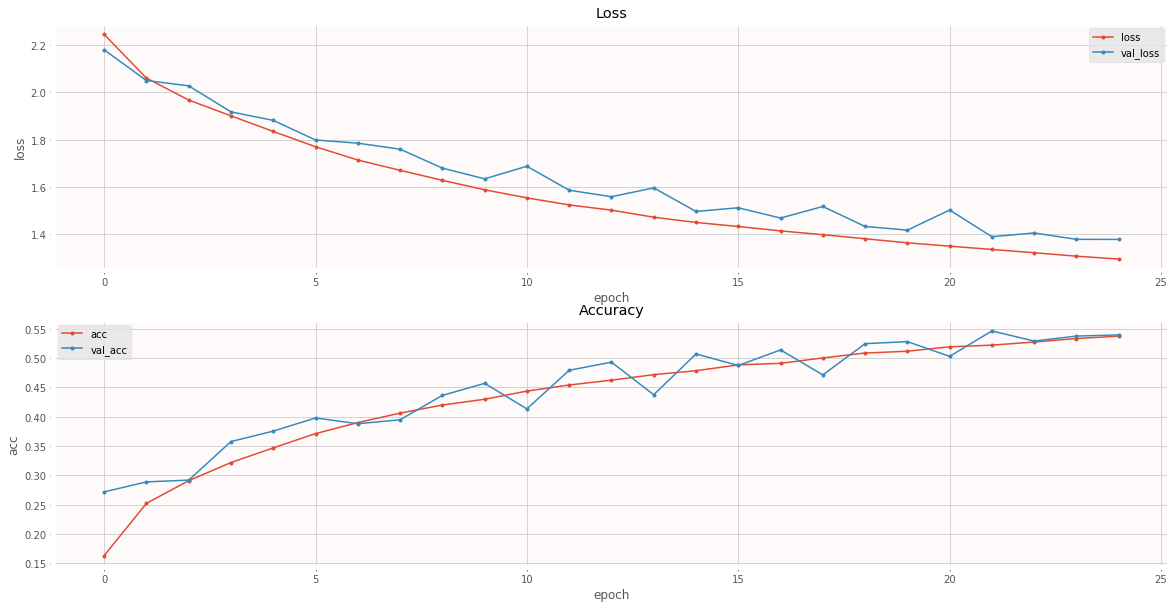

In [24]:
plot_history(history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 2s 57us/step - loss: 0.2002 - acc: 0.9212 - val_loss: 0.2099 - val_acc: 0.9160
Epoch 2/25
40000/40000 [==============================] - 2s 51us/step - loss: 0.1994 - acc: 0.9215 - val_loss: 0.2104 - val_acc: 0.9160
Epoch 3/25
40000/40000 [==============================] - 2s 51us/step - loss: 0.1988 - acc: 0.9217 - val_loss: 0.2095 - val_acc: 0.9164
Epoch 4/25
40000/40000 [==============================] - 2s 52us/step - loss: 0.1987 - acc: 0.9221 - val_loss: 0.2091 - val_acc: 0.9164
Epoch 5/25
40000/40000 [==============================] - 2s 52us/step - loss: 0.1987 - acc: 0.9218 - val_loss: 0.2089 - val_acc: 0.9166
Epoch 6/25
40000/40000 [==============================] - 2s 52us/step - loss: 0.1981 - acc: 0.9223 - val_loss: 0.2083 - val_acc: 0.9168
Epoch 7/25
40000/40000 [==============================] - 2s 51us/step - loss: 0.1982 - acc: 0.9222 - val_loss: 0.2080 - val_acc

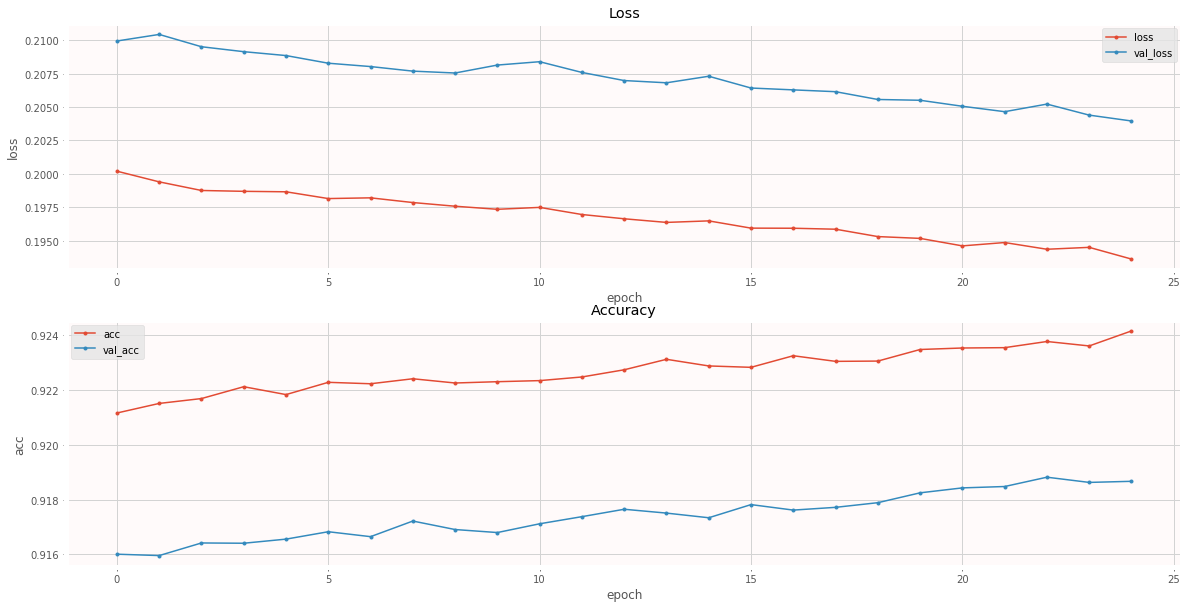

In [25]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
history = model.fit(x=x_img_train_normalize, 
                    y=y_label_train_OneHot, 
                    epochs=10, 
                    batch_size=256, 
                    validation_split=0.2, 
                    verbose=1)
plot_history(history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 2s 55us/step - loss: 0.0571 - acc: 0.5637 - val_loss: 0.0597 - val_acc: 0.5723
Epoch 2/10
40000/40000 [==============================] - 2s 50us/step - loss: 0.0571 - acc: 0.5633 - val_loss: 0.0596 - val_acc: 0.5737
Epoch 3/10
40000/40000 [==============================] - 2s 51us/step - loss: 0.0572 - acc: 0.5631 - val_loss: 0.0598 - val_acc: 0.5710
Epoch 4/10
40000/40000 [==============================] - 2s 50us/step - loss: 0.0572 - acc: 0.5614 - val_loss: 0.0597 - val_acc: 0.5720
Epoch 5/10
40000/40000 [==============================] - 2s 50us/step - loss: 0.0571 - acc: 0.5640 - val_loss: 0.0597 - val_acc: 0.5740
Epoch 6/10
40000/40000 [==============================] - 2s 50us/step - loss: 0.0570 - acc: 0.5630 - val_loss: 0.0596 - val_acc: 0.5734
Epoch 7/10
40000/40000 [==============================] - 2s 49us/step - loss: 0.0571 - acc: 0.5628 - val_loss: 0.0596 - val_acc

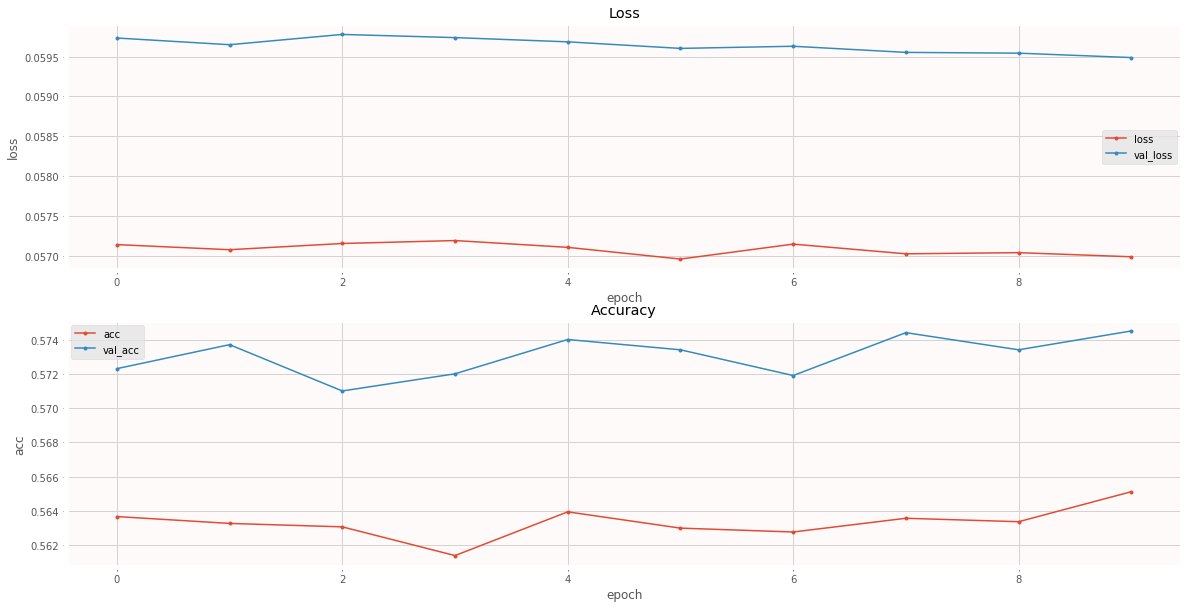

In [26]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['acc'])
history = model.fit(x=x_img_train_normalize, 
                    y=y_label_train_OneHot, 
                    epochs=10, 
                    batch_size=256, 
                    validation_split=0.2, 
                    verbose=1)
plot_history(history)